<a href="https://colab.research.google.com/github/JackyPro/AI_Course/blob/main/Day2/SVM_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.設定：複製一份程式到自己的雲端上，並且開啟副本

<table>
  <tr>
    <td bgcolor=#ccffcc>
      <center><img src="https://github.com/JackyPro/DL_imageclassification/raw/a26c0994e0caf0eac7fb219cdd95f235ded65cc4/img/1.png" width=70%>
      </center>
      <center><font size="6">Step 1<br /><br /></font></center> 
    </td>
  </tr>
  <tr>
    <td bgcolor=#D1EEEE>
      <center>
        <img src="https://github.com/JackyPro/DL_imageclassification/raw/a26c0994e0caf0eac7fb219cdd95f235ded65cc4/img/2.png" width=70%>
      </center>
      <center>
        <font size="6">Step 2<br /><br /></font>
        <font size="4">確認是否為副本<br />
        若為副本，代表程式檔已經複製在自己的雲端<br />
        可以自行修改檔名<br /><br /></font>
      </center> 
    </td>
  </tr>
  <tr>
    <td bgcolor=#ffffcc>
      <center><img src="https://github.com/JackyPro/DL_imageclassification/raw/a26c0994e0caf0eac7fb219cdd95f235ded65cc4/img/3.png" width=70%>
      </center>
      <center><font size="6">Step 3<br /><br /></font></center> 
    </td>
  </tr>
</table>



In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np

# Load dataset

In [ ]:
x, y = datasets.make_moons(n_samples=1000, noise=0.1, random_state=1)

In [ ]:
x, y = datasets.make_circles(n_samples=1000, noise=0.15, factor=0.1, random_state=1)

# View data

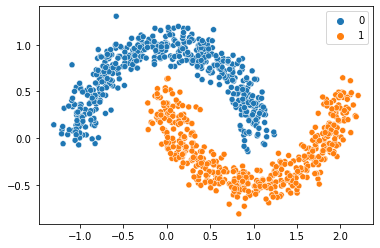

In [ ]:
sns.scatterplot(
                x = x[:,0],
                y = x[:,1],
                hue = y
                )
plt.show()

# data splitting

In [ ]:
# Splitting data into 80% training and 20% test data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1, stratify=y)

```
C = 1.0  # SVM regularization parameter
SVC(kernel='linear', C=C)
SVC(kernel='rbf', gamma=0.7, C=C)
SVC(kernel='poly', degree=3, C=C)

```

# GridSearch

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Set the parameter candidates
parameter_candidates = [
  {'C': [ 1], 'kernel': ['linear']},
  {'C': [ 1, 4, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
]

In [ ]:
# Create a classifier with the parameter candidates
clf = GridSearchCV(estimator=SVC(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on training data
clf.fit(x_train, y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1], 'kernel': ['linear']},
                         {'C': [1, 4, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}])

In [ ]:
# Print out the results 
print('Best score for training data:', clf.best_score_)
print('Best `C`:',clf.best_estimator_.C)
print('Best kernel:',clf.best_estimator_.kernel)
print('Best `gamma`:',clf.best_estimator_.gamma)

Best score for training data: 1.0
Best `C`: 4
Best kernel: rbf
Best `gamma`: 1


# Training

In [ ]:
model = SVC(
            kernel = 'rbf',
            gamma = 1,
            C=1
        )
model.fit(x_train, y_train)

SVC(C=1, gamma=1)

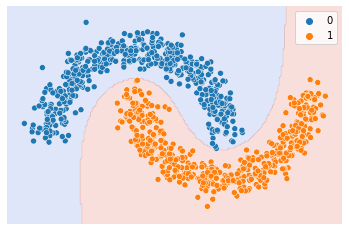

In [ ]:
x_min, x_max = x[:, 0].min() - 0.2, x[:, 0].max() + 0.2
y_min, y_max = x[:, 1].min() - 0.2, x[:, 1].max() + 0.2
xx, yy = np.meshgrid(
                        np.arange(x_min, x_max, 0.02),
                        np.arange(y_min, y_max, 0.02)
                    )
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,  levels = 3, cmap='coolwarm', alpha=0.2)
plt.axis('off')

color_map = {
                -1: ( 1, 1, 1),
                 0: ( 0, 0,.9),
                 1: ( 1, 0, 0),
                 2: (.8,.6, 0)
            }
colors = [color_map[t] for t in y]
#plt.scatter(x[:, 0], x[:, 1], c = colors, edgecolors = 'black')
sns.scatterplot(
                x = x[:,0],
                y = x[:,1],
                hue = y
                )
plt.show()

# Predict

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 1.00


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[100,   0],
       [  0, 100]], dtype=int64)